# Lab work 7. Clustering Problem Solving

## 1. Theoretical part

### 1.1. Importing libraries and reading a dataset

In [1]:
# Libraries importing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
# Read a dataset and show it
customer_set = pd.read_csv('shopping.csv')
customer_set

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 1.1. Data preprocessing

In [3]:
# Show the top 5 rows of the datased we read
customer_set.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Show the last 5 rows of the datased we read
customer_set.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# Show the shape of the dataset
customer_set.shape

(200, 5)

In [6]:
# Get some general information about the dataset
customer_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Check the dataset for any missing data
customer_set.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
# Remove all rows that cantains missing elements 
customer_set.dropna(inplace=True)

In [9]:
# Get general information about the dataset after the removal
customer_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


***From the results we can see that all 200 lines contain non-zero data. Let's do another test that counts the number of NaN values.***

In [10]:
customer_set.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# Build a DataFrame from columns 3 and 4, which we will use as features
x = customer_set.iloc[:, [3,4]].values

### 1.2. Model building

***Implementation of the k-means algorithm to determine the optimal number of clusters.***

In [12]:
# Importing Kmeans
from sklearn.cluster import KMeans
clalist=[]

***We will use the elbow method to determine k with the parameter "k-means++"***

#### The Elbow Method

The general formula looks like the following one:
$$D_{k} = \sum_{i=1}^k \sum dist(x,C_i)$$

***In simple language: this method helps us to choose the optimal number of clusters.***

![DataClustering_ElbowCriterion.jpg](DataClustering_ElbowCriterion.jpg)
Elbow means elbow. This method is suitable for the case where the K value is relatively small. When the selected k value is less than the true value, every time k increases by 1, the cost value will be greatly reduced; when the selected k value is greater than the true value When k is increased by 1, the change in cost value will not be so obvious. In this way, the correct k value will be at this turning point, similar to elbow.

Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

The intuition is that increasing the number of clusters will naturally improve the fit (explain more of the variation), since there are more parameters (more clusters) to use, but that at some point this is over-fitting, and the elbow reflects this. For example, given data that actually consist of k labeled groups – for example, k points sampled with noise – clustering with more than k clusters will "explain" more of the variation (since it can use smaller, tighter clusters), but this is over-fitting, since it is subdividing the labeled groups into multiple clusters. The idea is that the first clusters will add much information (explain a lot of variation), since the data actually consist of that many groups (so these clusters are necessary), but once the number of clusters exceeds the actual number of groups in the data, the added information will drop sharply, because it is just subdividing the actual groups. Assuming this happens, there will be a sharp elbow in the graph of explained variation versus clusters: increasing rapidly up to k (under-fitting region), and then increasing slowly after k (over-fitting region).

In practice there may not be a sharp elbow, and as a heuristic method, such an "elbow" cannot always be unambiguously identified.

In [13]:
#inertia_ is a method that divides data points into clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    clalist.append(kmeans.inertia_)    

C:\Users\kirin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


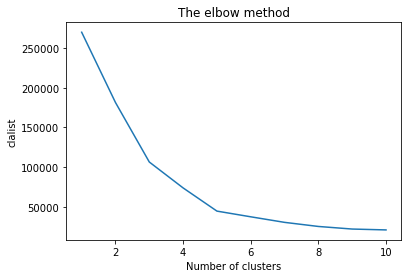

In [14]:
plt.plot(range(1,11), clalist)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('clalist')
plt.show()

***We choose 5 (the number of future clasters that we're going to find in future) because, as it can be seen from the graph, after 5 the last fracture occurs and the curvature ceases to be so noticeable***

#### K-Means Clustering (Pseudocode)
1. Choose the number of clusters(K) and obtain the data points 
2. Place the centroids c_1, c_2, ..... c_k randomly 
3. Repeat steps 4 and 5 until convergence or until the end of a fixed number of iterations
4. for each data point x_i:
       - find the nearest centroid(c_1, c_2 .. c_k) 
       - assign the point to that cluster 
5. for each cluster j = 1..k
       - new centroid = mean of all points assigned to that cluster
6. End 

In [15]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

### 1.3. Visualization

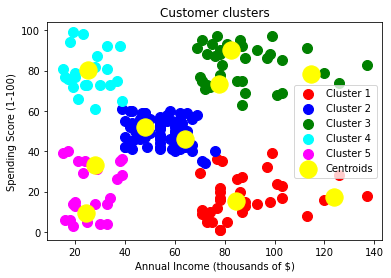

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[0:10, 0], kmeans.cluster_centers_[0:10, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer clusters')
plt.xlabel('Annual Income (thousands of $)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***This visualization allows us to make sure that the clustering is successful and we have just 5 optimal groups of customers.Let's check what we will get if we choose 7 instead of 5.***

In [17]:
kmeansmodel = KMeans(n_clusters= 7, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

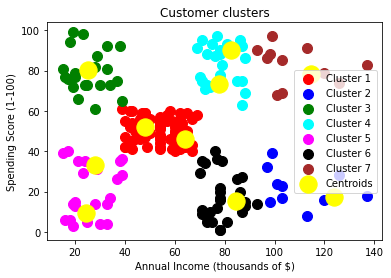

In [18]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(x[y_kmeans == 6, 0], x[y_kmeans == 6, 1], s = 100, c = 'brown', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[0:10, 0], kmeans.cluster_centers_[0:10, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Customer clusters')
plt.xlabel('Annual Income (thousands of $)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***As it could be seen, there aren't any special changes, thus it was an excessive action. This exapmle is pretty simple, but obvious, for real cases time wasting for excessive clusters will be much more serious***

## 2. Practical part

### A simple dataset "California Housing Prices Datasets" was selected for this work from the following Kaggle topic: https://www.kaggle.com/camnugent/california-housing-prices. 

### It contains median house prices for California districts derived from the 1990 census. Therefore this dataset is very suitable for House Prices Clusterization by using k-means method and the elbow method.

***Links to download: [housing.cvs](https://www.kaggle.com/camnugent/california-housing-prices/download)***

### 2.1. Importing libraries and reading a dataset

In [19]:
# Libraries importing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [20]:
# Read a dataset and show it
califhousing_set = pd.read_csv('housing.csv')
califhousing_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 2.1. Data preprocessing

In [21]:
# Show the top 5 rows of the datased we read
califhousing_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
# Show the last 5 rows of the datased we read
califhousing_set.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [23]:
# Show the shape of the dataset
califhousing_set.shape

(20640, 10)

In [24]:
# Get some general information about the dataset
califhousing_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [25]:
# Check the dataset for any missing data
califhousing_set.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [26]:
# Remove all rows that cantains missing elements 
califhousing_set.dropna(inplace=True)

In [27]:
# Get general information about the dataset after the removal
califhousing_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [28]:
# Check the dataset for any null elements
califhousing_set.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [29]:
# Build a DataFrame from columns "total_rooms" and "median_house_value", which we will use as features
x = califhousing_set[['total_rooms', 'median_house_value']].values
x

array([[   880., 452600.],
       [  7099., 358500.],
       [  1467., 352100.],
       ...,
       [  2254.,  92300.],
       [  1860.,  84700.],
       [  2785.,  89400.]])

### 2.2. Model building

In [30]:
# Importing Kmeans
from sklearn.cluster import KMeans
clalist=[]

In [31]:
#inertia_ is a method that divides data points into clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    clalist.append(kmeans.inertia_)    

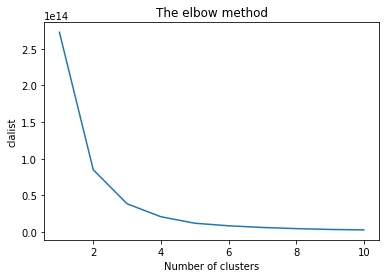

In [32]:
plt.plot(range(1,11), clalist)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('clalist')
plt.show()

***So, as it could be noticed form the chart above, the optimal number of clusters is 4***

In [33]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

### 1.3. Visualization

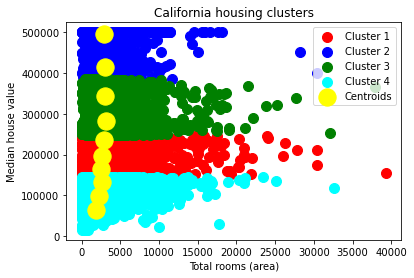

In [34]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[0:10, 0], kmeans.cluster_centers_[0:10, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('California housing clusters')
plt.xlabel('Total rooms (area)')
plt.ylabel('Median house value')
plt.legend()
plt.show()

***As it can be predictable, the chart above shows us that bigger houses cost more, as usually. But also the position of the centroids tells us that there aren't many very-very big houses, de-facto all the centroids stands on almost straight axis. But the values are very different. Thus, we can say that in California, the area of the house is not a decisive factor in its value.***

#### Let's make one more test with another argument column, which will give us more linear dependence

In [35]:
# Build a DataFrame from columns "total_rooms" and "median_house_value", which we will use as features
x = califhousing_set[['median_income', 'median_house_value']].values
x

array([[8.3252e+00, 4.5260e+05],
       [8.3014e+00, 3.5850e+05],
       [7.2574e+00, 3.5210e+05],
       ...,
       [1.7000e+00, 9.2300e+04],
       [1.8672e+00, 8.4700e+04],
       [2.3886e+00, 8.9400e+04]])

In [36]:
# Importing Kmeans
from sklearn.cluster import KMeans
clalist=[]

In [37]:
#inertia_ is a method that divides data points into clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    clalist.append(kmeans.inertia_)    

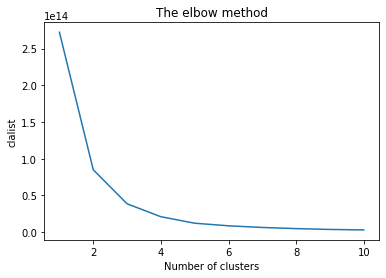

In [38]:
plt.plot(range(1,11), clalist)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('clalist')
plt.show()

In [39]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

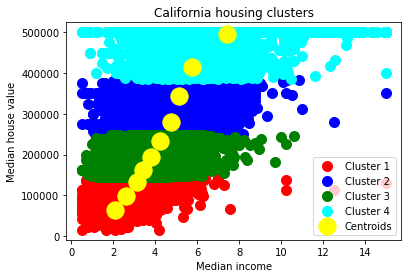

In [40]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[0:10, 0], kmeans.cluster_centers_[0:10, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('California housing clusters')
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.legend()
plt.show()

***Here we have strong dependence between the income, that a particular house brings to his owner and the value of this house. But as we can see, green and blue clusters are very close, so let's make the final test - reduce the number of clusters.*** 

In [41]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

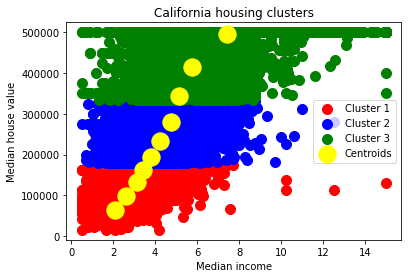

In [42]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[0:10, 0], kmeans.cluster_centers_[0:10, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('California housing clusters')
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.legend()
plt.show()

***This can be explained by the fact that the chart of the number of clusters shows that the difference between 3 and 4 is also not very large, although it is more significant than between 4 and 5, 6, etc. Therefore, if we select, for example, 6 clusters, we will see the situation worse, the clusters are very small and there are practically no differences between any two neighboring clusters.***

In [43]:
kmeansmodel = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

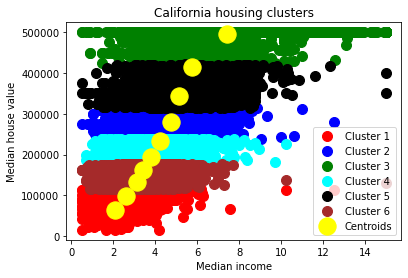

In [44]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[0:10, 0], kmeans.cluster_centers_[0:10, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('California housing clusters')
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.legend()
plt.show()